![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to  Network Analysis](0_Intro_Network_Analysis.ipynb)

# Pandas integration

## Dataset Game of Thrones

Character Interaction Networks for George R. R. Martin's "A Song of Ice and Fire" saga

Available at https://github.com/mathbeveridge/asoiaf

Based on https://mriduls.github.io/pydata-networkx/introduction-and-game-of-thrones-instructor.html

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx.algorithms.connectivity as nxcon
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
book1 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book1-edges.csv')

We inspect the dataset. **weight** shows the number of interactions of the characters in the book.

In [3]:
book1.head(5)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


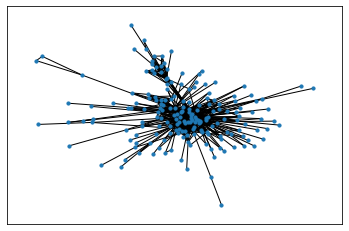

In [4]:
import networkx as nx

G1 = nx.from_pandas_edgelist(book1, 'Source', 'Target', ['weight']) #df, source, target, [columns with attrbs]

pos = nx.spring_layout(G1)
#pos = nx.circular_layout(G1)
#pos = nx.spectral_layout(G1)
#pos = nx.random_layout(G1)
nx.draw_networkx(G1, pos = pos, node_size=10, with_labels=False)  

Let's inspect...

In [5]:
list(G1.edges(data=True))[16]

('Jaime-Lannister', 'Loras-Tyrell', {'weight': 3})

## Most important nodes

In [6]:
degree_1 = nx.degree_centrality(G1)
sorted(degree_1.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

## Histogram of degree centrality

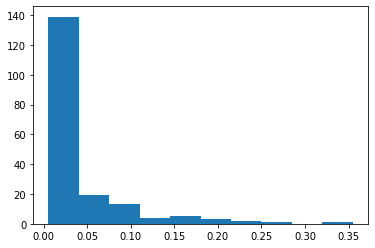

In [7]:
plt.hist(list(nx.degree_centrality(G1).values()))
plt.show()

## References
* [NetworkX introduction](https://mriduls.github.io/pydata-networkx/introduction-and-game-of-thrones-instructor.html)

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.